<a href="https://colab.research.google.com/github/MohWikiDarmawan07/PCVK/blob/main/pcvk11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection
Metode yang digunakan:


1.   Template Matching
2.   edge detection
3. corner detection
4. grid detection
5. countur detection



In [1]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

implementasi 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

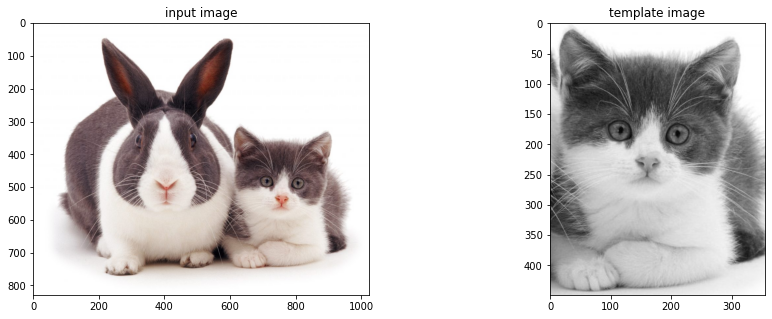

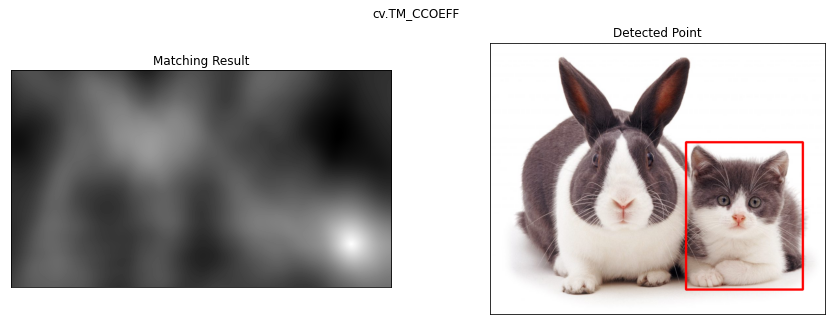

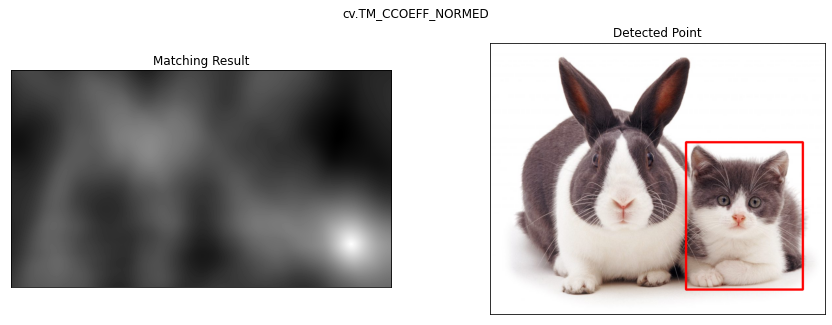

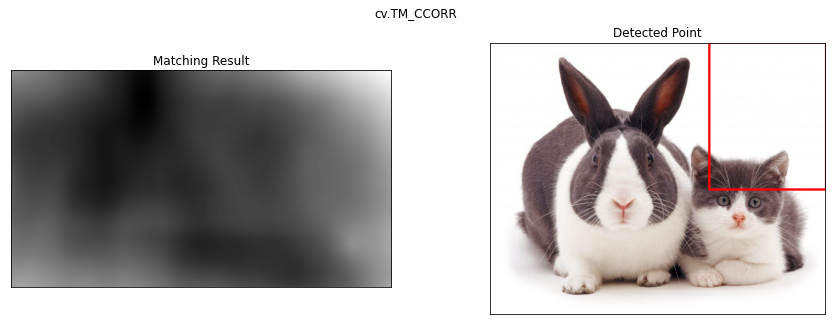

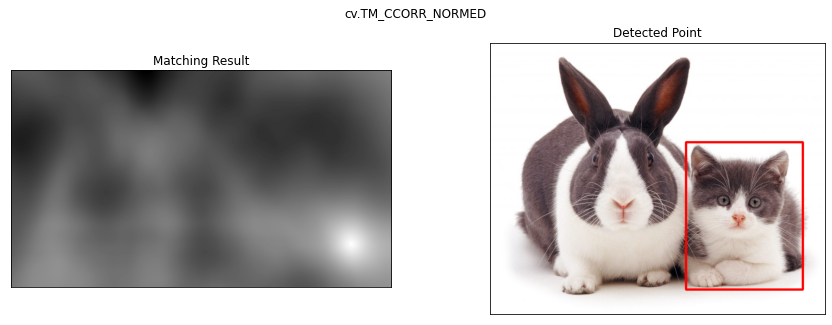

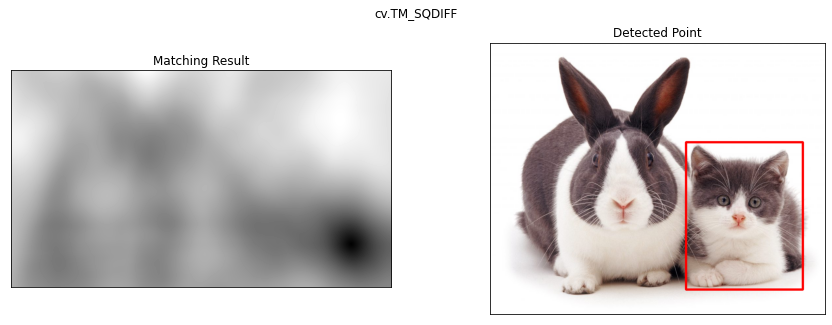

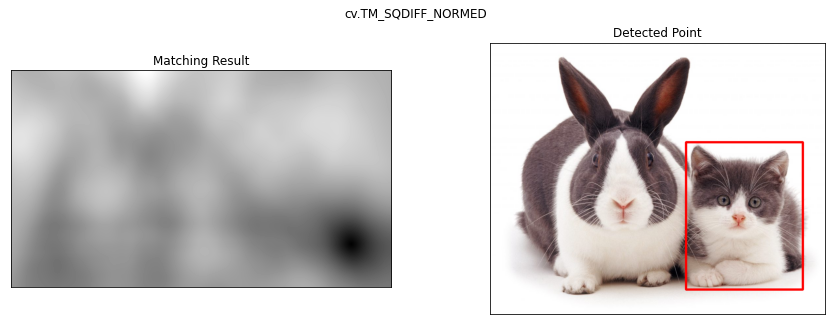

In [4]:
#sumber(https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/cat2_templatejpg.jpg',0) #membaca gambar grayscale
w, h = template.shape[::-1] 

#plot gambar asli
f, axarr = plt.subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Terapkan Pencocokan template
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # Jika metodenya TM_SQDIFF atau TM_SQDIFF_NORMED, ambil minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    #titik kanan
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #menggambar bentuk geometris dengan OpenCV
    cv.rectangle(img,top_left, bottom_right, (0,0,255), 5)
    #plot gambar hasil
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Implementasi metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg

In [6]:
original_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/parking-lot-cars.jpg') 

# mengubah ke gray scale
gray = cv.cvtColor(original_img, cv.COLOR_BGR2GRAY)

# Kurangi noise pada gambar
img = cv.GaussianBlur(gray,(3,3),0)

Sobel Edge Detection


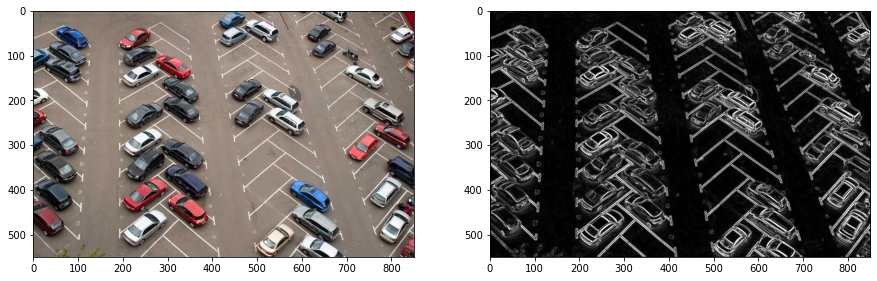

In [7]:
# sumber(https://learnopencv.com/edge-detection-using-opencv/)
# Sobel Edge Detection

# mendapatkan pemfilteran Sobel horizontal dan vertikal dari gambar
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# gambar dengan kernel Sobel horizontal dan vertikal diterapkan
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

print("Sobel Edge Detection")
#Plot gambar
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
plt.show()

Canny Edge Detection


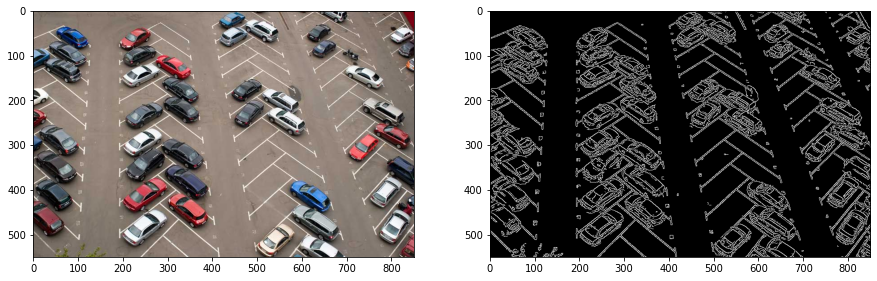

In [8]:
#sumber(https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

# Canny Edge Detection
edges = cv.Canny(original_img,100,200)

print("Canny Edge Detection")
#Plot gambar
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.show()